# **🩺 LIVER DISEASE PREDICTION USING MACHINE LEARNING TECHNIQUES 🩺**
                                                BY: Dhivyaa D M

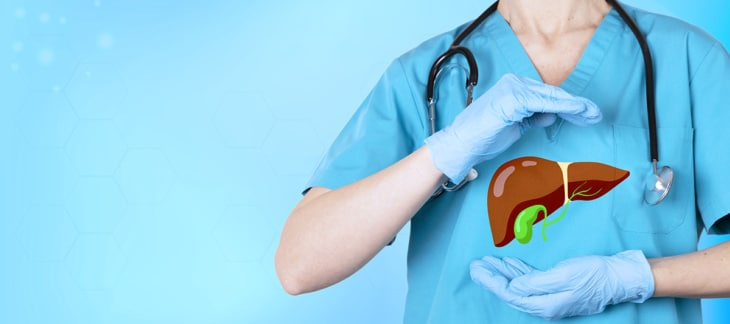

## **PROBLEM STATEMENT**

Liver disease is a critical public health concern, often progressing silently until it reaches an advanced stage. Early detection of liver disorders is essential to improve patient outcomes, reduce mortality, and enable timely clinical intervention. However, traditional diagnosis relies heavily on multiple biochemical tests and expert interpretation, which can be time-consuming and prone to human error.

The objective of this project is to build a machine learning–based classification model that can accurately predict whether a patient is suffering from liver disease based on routinely collected clinical and biochemical attributes such as age, gender, bilirubin levels, liver enzymes, protein levels, and albumin–globulin ratio.

## **DATASET DESCRIPTION**

This is a Liver Patient identification Dataset. The target is to identify whether the patient has an anomaly or abnormal functioning of the liver.

---

### **Target Variable:**

The **target variable**, `Dataset`, is a binary categorical column that indicates the liver disease status of a patient.
A value of **1** represents a **liver disease patient**, while a value of **2** represents a **non-liver disease (healthy) patient**.

>This variable serves as the dependent variable for the supervised classification task, where the objective is to accurately identify patients with liver disease while minimizing false negatives due to the medical significance of early diagnosis.

---

### **FEATURE COLUMNS DESCRIPTION**

The **feature columns** consist of both demographic and biochemical attributes that act as independent variables for model training and prediction.

* **Age** represents the patient’s age in years and helps capture age-related risk patterns associated with liver disease.
* **Gender** indicates the biological sex of the patient and is included due to observed differences in liver disease prevalence across genders.
* **Total_Bilirubin** measures the total bilirubin level in the blood and reflects liver’s ability to process waste products.
* **Direct_Bilirubin** represents the conjugated bilirubin level and is an important indicator of liver and bile duct function.
* **Alkaline_Phosphotase** indicates enzyme activity related to bile flow and liver obstruction.
* **Alamine_Aminotransferase (ALT)** reflects liver cell injury and is commonly elevated in liver disease patients.
* **Aspartate_Aminotransferase (AST)** measures another liver enzyme associated with hepatic damage.
* **Total_Proteins** indicates the total protein content in the blood, reflecting liver synthetic function.
* **Albumin** measures the primary protein produced by the liver and is crucial for assessing liver health.
* **Albumin_and_Globulin_Ratio** captures the balance between albumin and globulin proteins and is a clinically significant indicator of chronic liver dysfunction.

# 1. IMPORTING REQUIRED LIBRARIES

In [325]:
import warnings
warnings.filterwarnings('ignore')

# DATA HANDLING

import pandas as pd
import numpy as np


# VISUALIZATION

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


#  PREPROCESSING

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import label_binarize
from sklearn.impute import SimpleImputer


# METRICS

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    roc_curve,
    auc
)

# MODELS

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC



# STATISTICAL TOOLS

from statsmodels.stats.outliers_influence import variance_inflation_factor


# IMBALANCED DATA

from imblearn.over_sampling import SMOTE

# 2. LOADING THE DATASET

In [326]:
# ==== Load Data ====
df=pd.read_csv('liver.csv')
# ==== Checking first five rows of dataset ====
df.head().T

,0,1,2,3,4
Age,65,62,62,58,72
Gender,Female,Male,Male,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1.0,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2.0
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7.0,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [327]:
# ==== Checking last five rows of dataset ====
df.tail().T

,578,579,580,581,582
Age,60,40,52,31,38
Gender,Male,Male,Male,Male,Male
Total_Bilirubin,0.5,0.6,0.8,1.3,1.0
Direct_Bilirubin,0.1,0.1,0.2,0.5,0.3
Alkaline_Phosphotase,500,98,245,184,216
Alamine_Aminotransferase,20,35,48,29,21
Aspartate_Aminotransferase,34,31,49,32,24
Total_Protiens,5.9,6.0,6.4,6.8,7.3
Albumin,1.6,3.2,3.2,3.4,4.4
Albumin_and_Globulin_Ratio,0.37,1.1,1.0,1.0,1.5


In [328]:
df.Dataset.value_counts()

,count
Dataset,
1,416
2,167


In [329]:
df.shape

(583, 11)

In [330]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [331]:
# ==== To view the summary stats of numerical columns ====
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [332]:
# ==== To View the categorical columns ====
df.describe(include='O')

,Gender
count,583
unique,2
top,Male
freq,441


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


The dataset has 583 rows and 11 columns. Out of these, 10 columns are numbers and 1 columns are catgory.

There are 4 missing values in Albumin_and_Globulin_Ratio. And every column shows non-null.

# 3. EDA

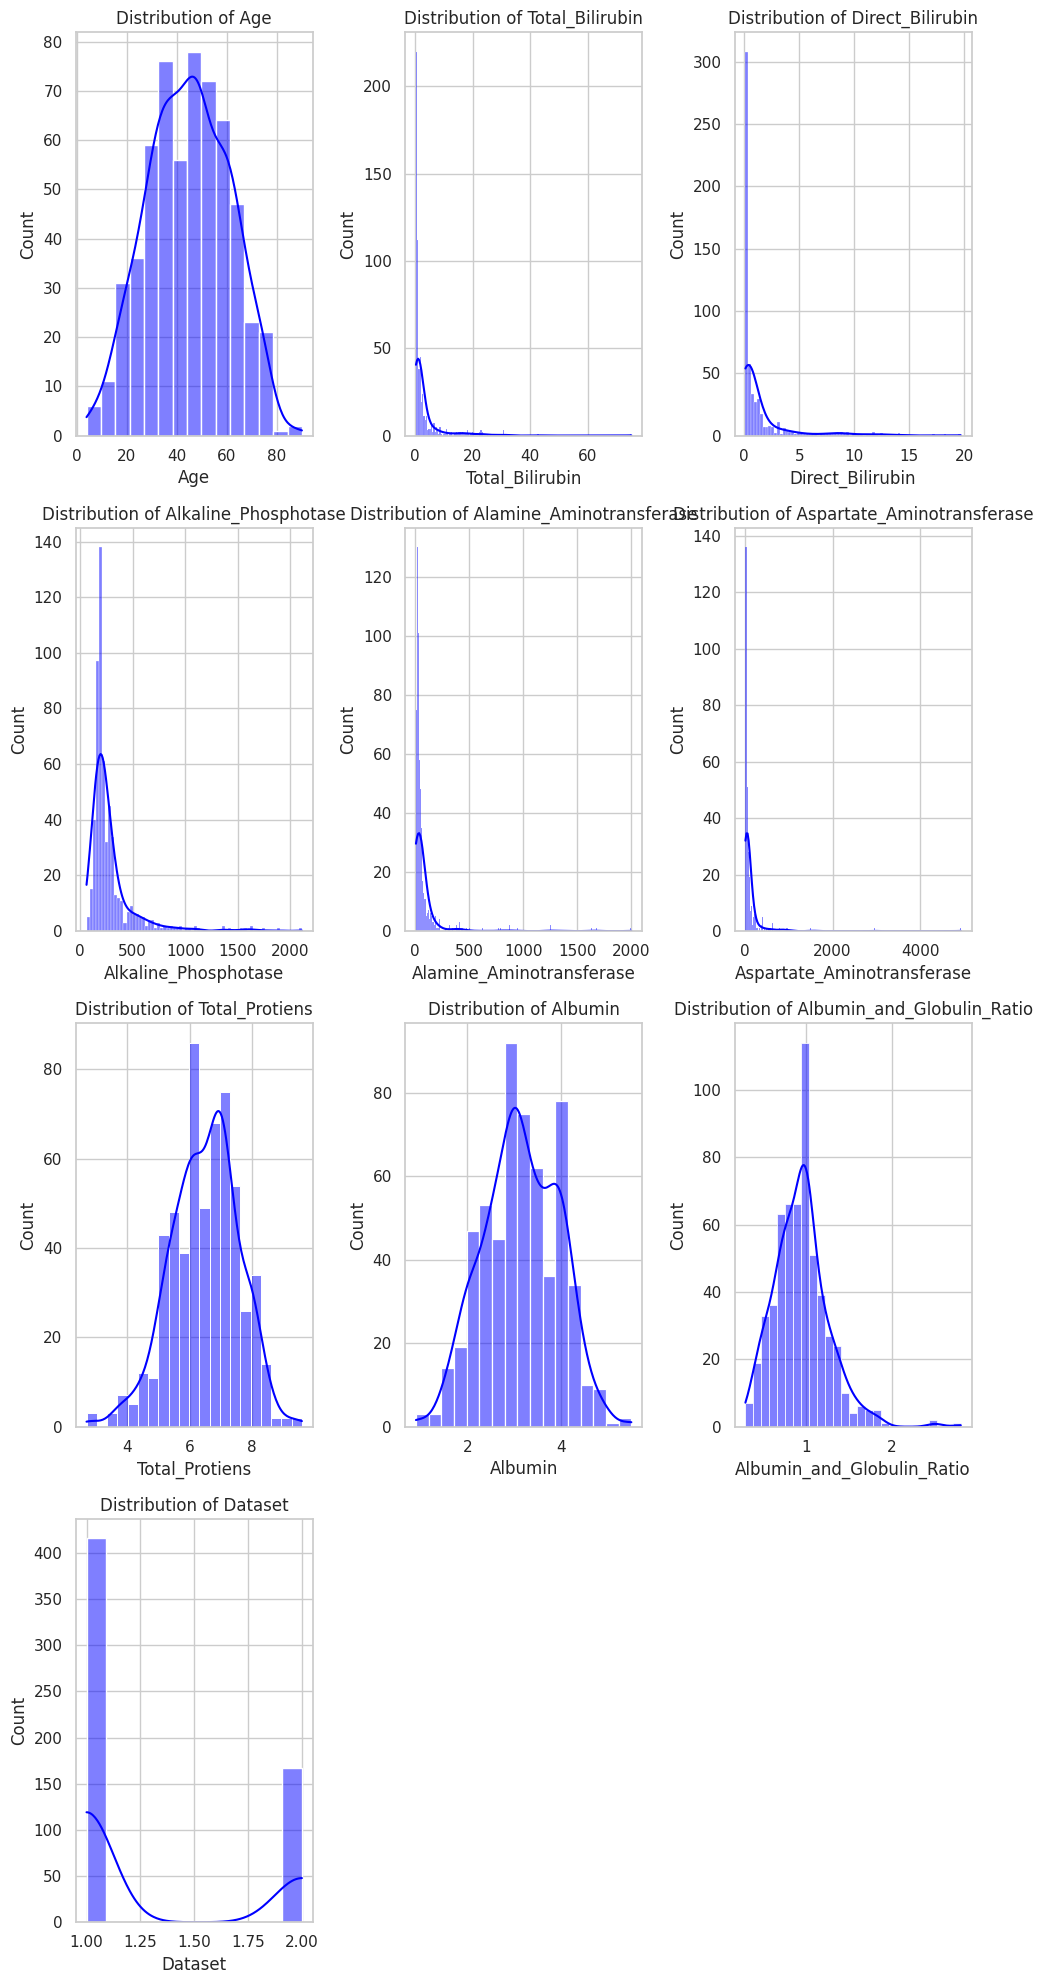

In [334]:
#==== Visualization of Skewness using histplot in the dataset=====

#UNIVARIATE EDA

num_cols = df.select_dtypes(include='number').columns

# Define grid size: 3 columns per row
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(10, 5 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, color='blue')
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

This combined visual (histplot + KDE) and numerical (skewness coefficient) approach ensures a robust understanding of how much skewness is present and whether transformation techniques (e.g., log, Box-Cox, or Yeo-Johnson) are required before modeling.

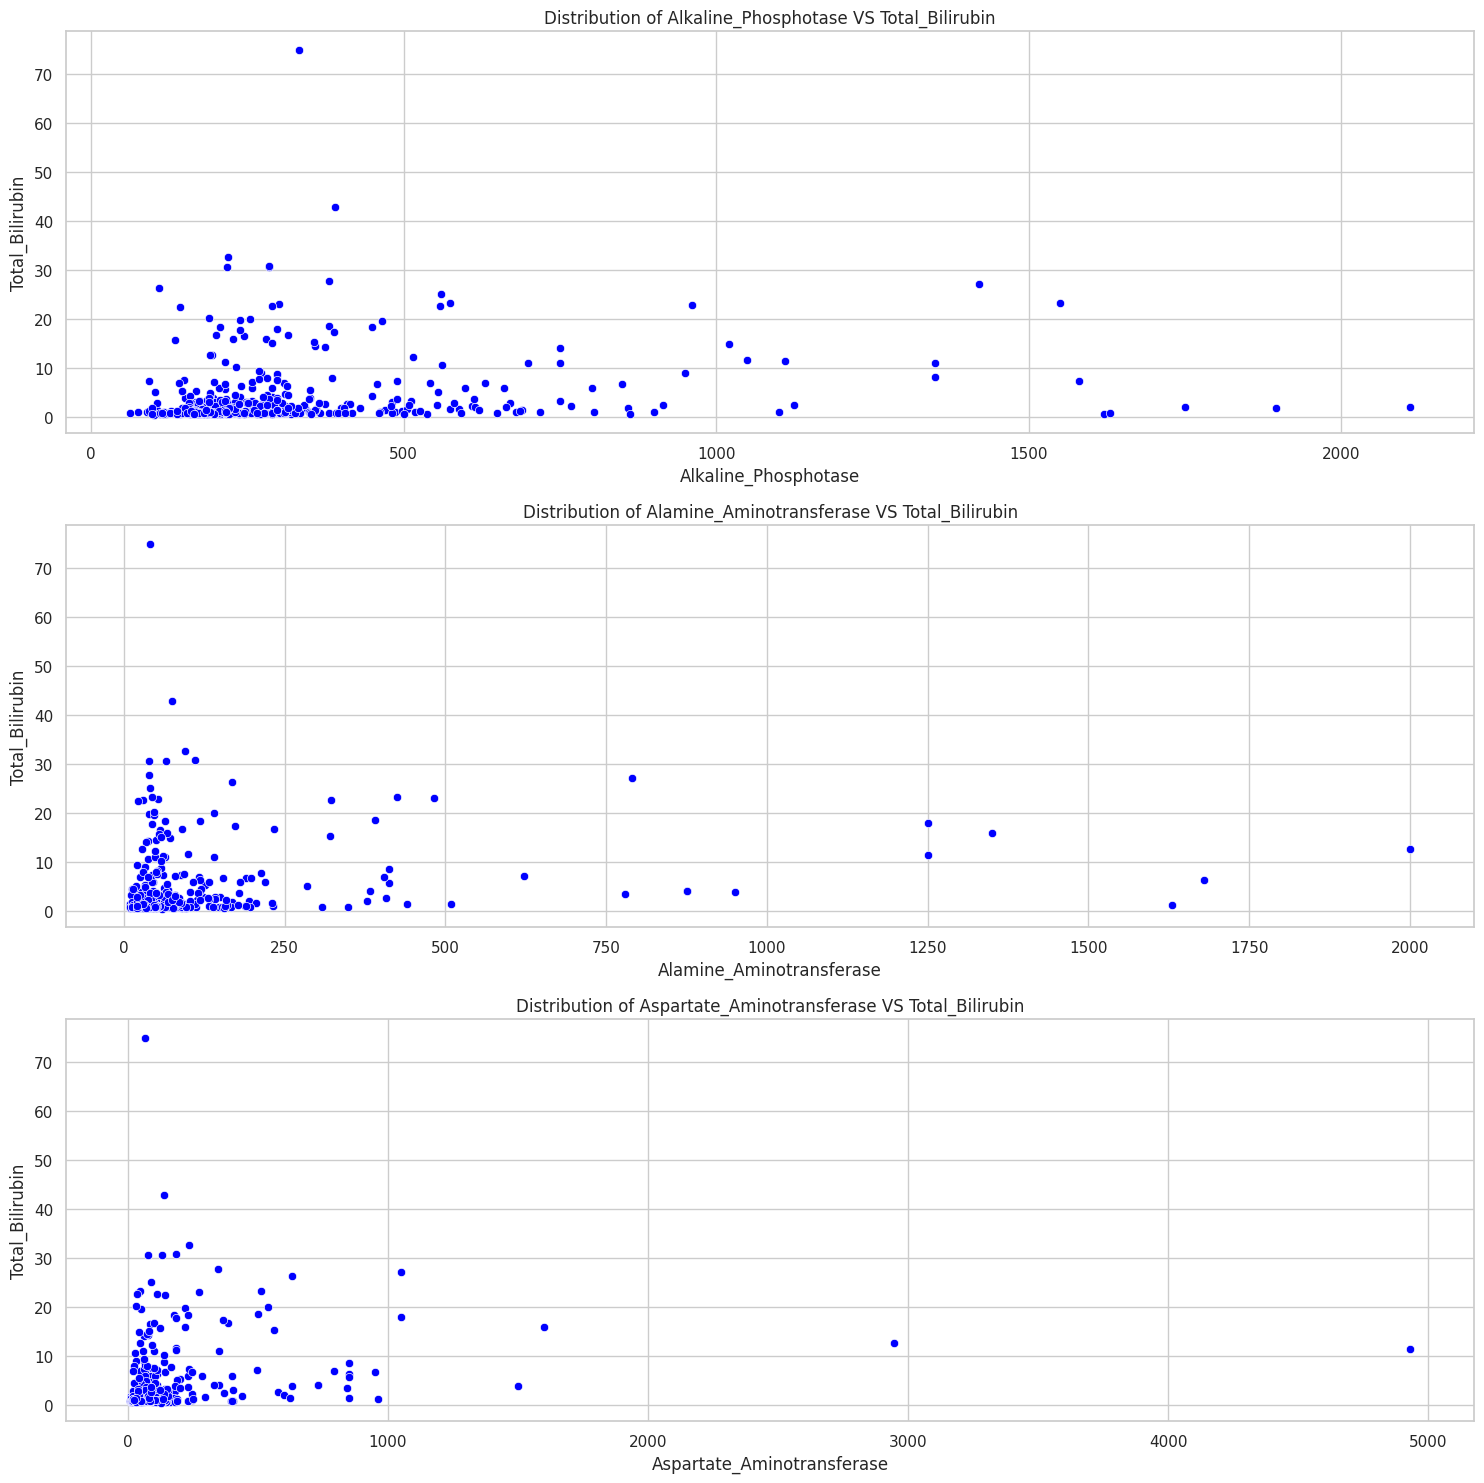

In [335]:
#=====Visualization of scatterplot: How much liver enymes is related with Total_Bilirubin=====
liver_enzymes=['Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase']

plt.figure(figsize=(15,15))
plts=1
for i in liver_enzymes:
  plt.subplot(3,1,plts)
  sns.scatterplot(x=df[i], y=df['Total_Bilirubin'], color='blue')
  plts+=1
  plt.xlabel(i)
  plt.title(f'Distribution of {i} VS Total_Bilirubin')
plt.tight_layout()
plt.show()

The scatterplots show that higher liver enzyme levels are generally linked to higher bilirubin levels, but the relationship varies across patients and includes some severe cases.

<Figure size 800x900 with 0 Axes>

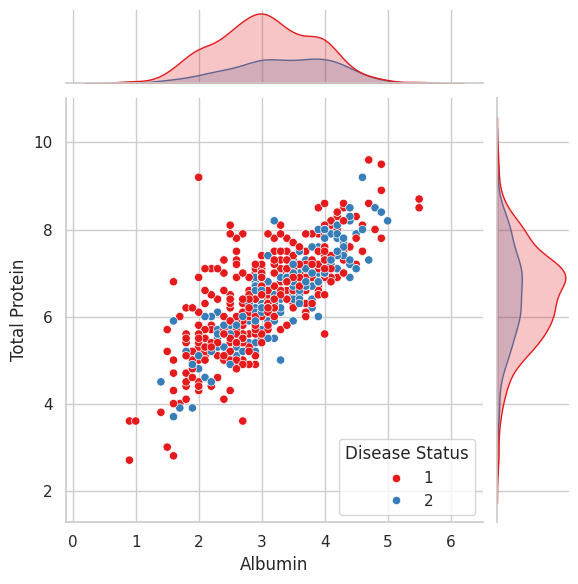

In [336]:
#=======Visualization of scatterplot: Albumin vs Total Protein by Liver Disease Status===========
plt.figure(figsize=(8,9))

sns.jointplot(
    data=df,
    x="Albumin",
    y="Total_Protiens",
    hue="Dataset",
    palette="Set1"
)
plt.xlabel("Albumin")
plt.ylabel("Total Protein")
plt.legend(title="Disease Status")

plt.show()


The relationship and distribution of Albumin and Total Protein across liver disease statuses. It clearly shows correlation, group overlap, and distribution differences, making it ideal for identifying patterns and potential diagnostic insights.


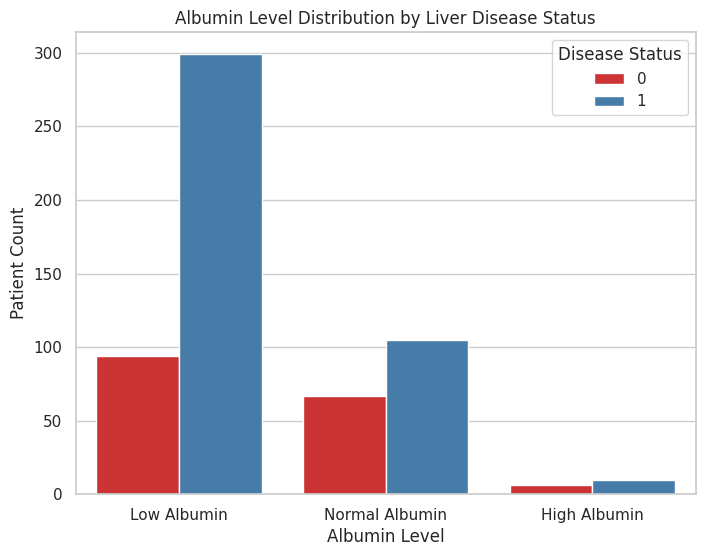

In [337]:
#======== Visualization of scatterplot: “Comparative Analysis of Albumin Categories in Liver Disease”=======

#BIVARIATE EDA

df['Dataset']=df['Dataset'].map({1:1,2:0})  # Labels were changed to 0 and 1 to clearly represent liver and non-liver patients.
df1=df.copy()
df1["Albumin_Level"] = pd.cut(
    df["Albumin"],
    bins=[0.9, 3.5, 4.5, 5.5],
    labels=["Low Albumin", "Normal Albumin", "High Albumin"]
)


plt.figure(figsize=(8,6))

sns.countplot(
    data=df1,
    x="Albumin_Level",
    hue="Dataset",
    palette="Set1"
)

plt.title("Albumin Level Distribution by Liver Disease Status")
plt.xlabel("Albumin Level")
plt.ylabel("Patient Count")
plt.legend(title="Disease Status")

plt.show()


A dedicated DataFrame (df1) was constructed exclusively for this visualization to transform continuous Albumin values into clinically meaningful categories. Using a count plot, this approach clearly compares the distribution of liver disease and non-disease patients across albumin levels, improving interpretability, clinical relevance, and clarity of insights.


The original target labels (1 and 2) were remapped to a binary format (1 = Liver Patient, 0 = Non-Liver Patient) to avoid ambiguity, simplify interpretation, and ensure compatibility with machine learning algorithms that expect binary targets.

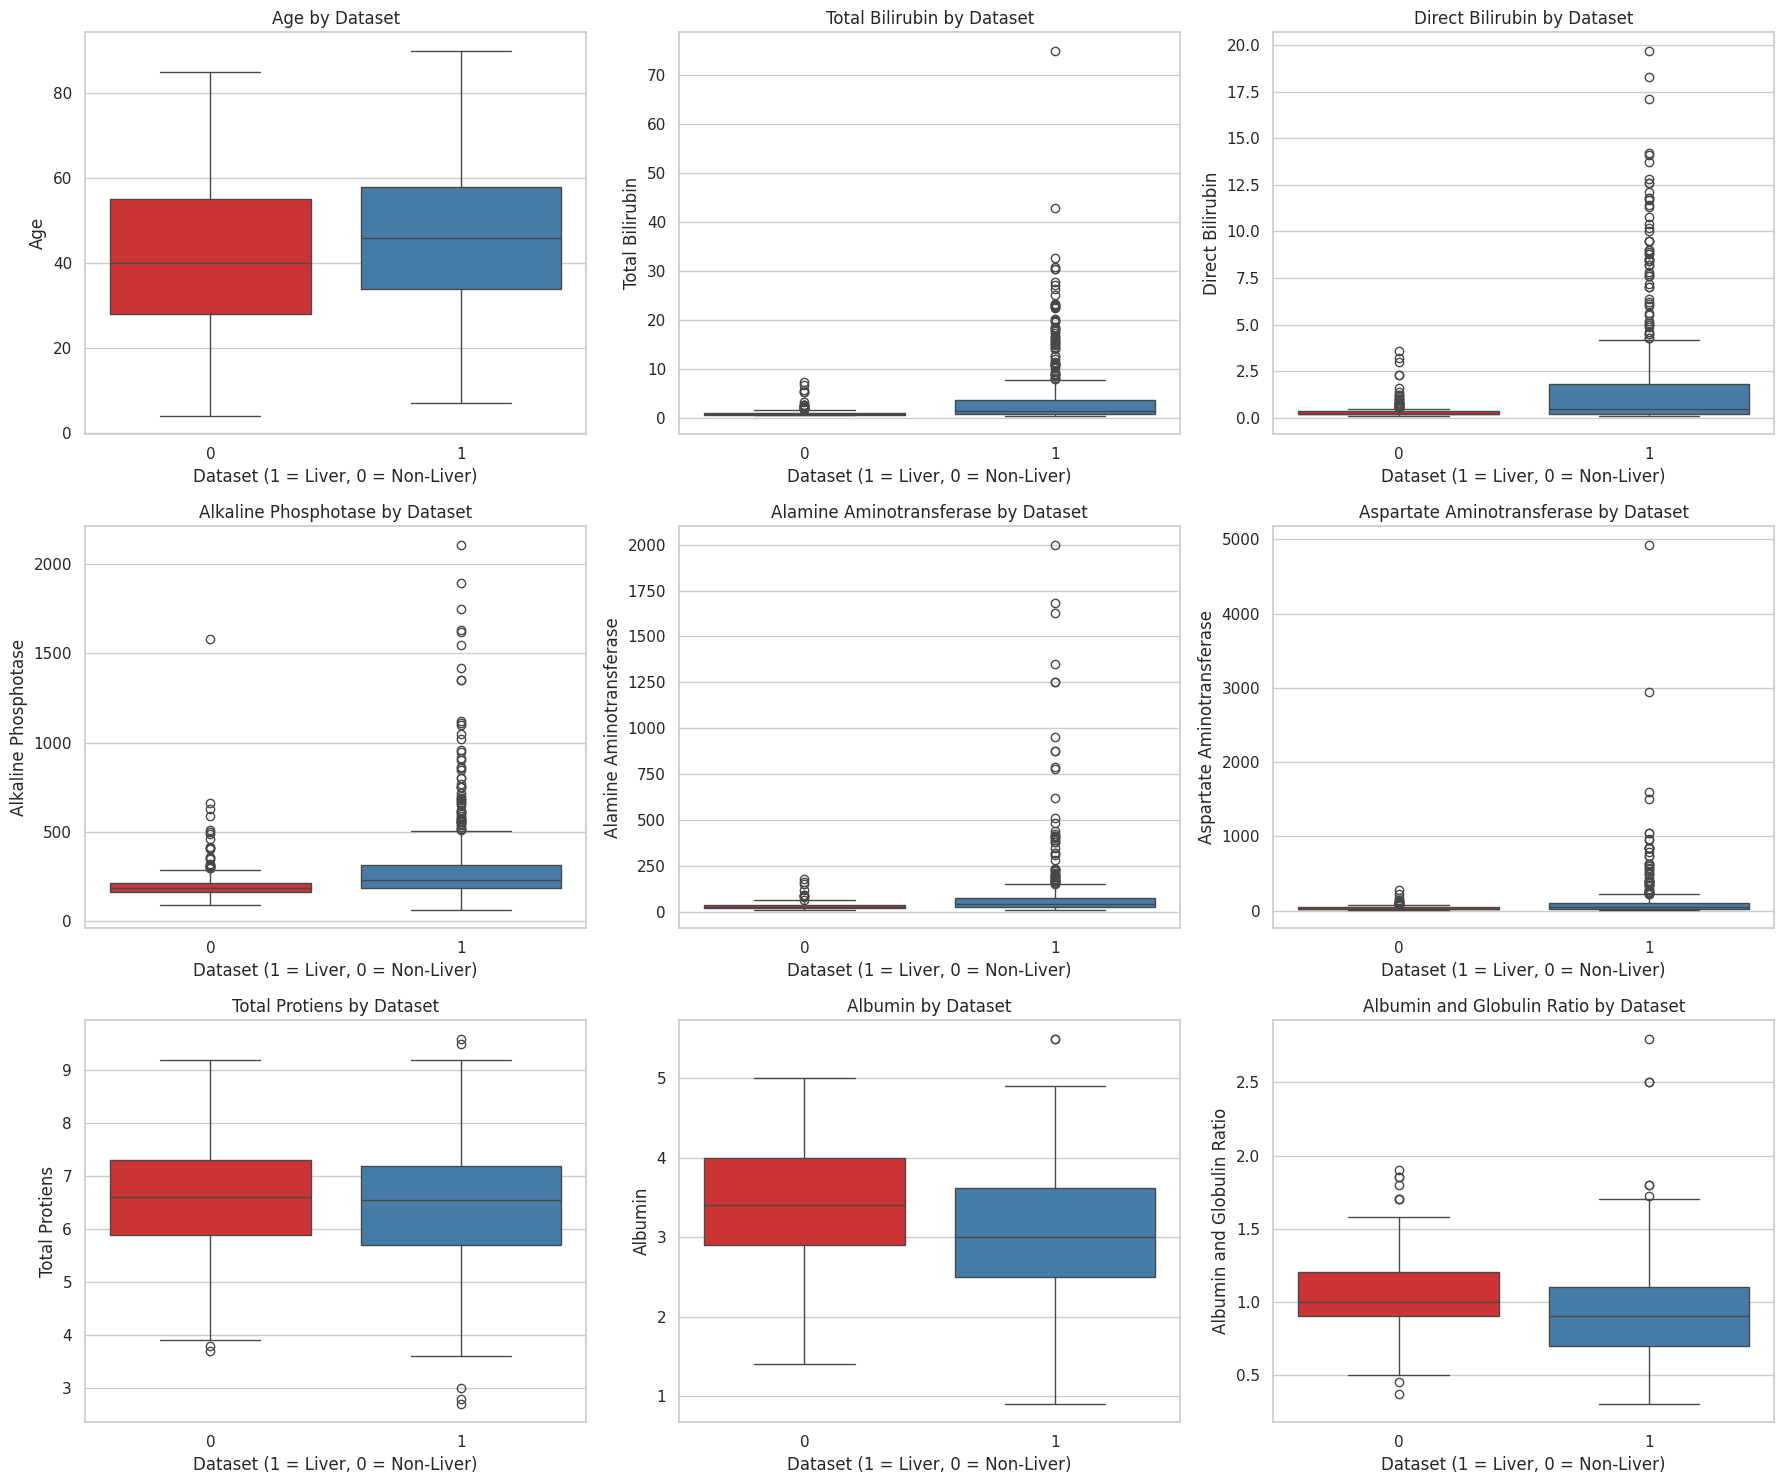

In [338]:
#======Visualization of Boxplot: Checking for the Outliers=======

import math

# Select numerical columns (exclude target)
num_cols = df.select_dtypes(include='number').columns.drop('Dataset')

n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)

    sns.boxplot(
        data=df,
        x="Dataset",
        y=col,
        palette="Set1"
    )

    plt.title(f"{col.replace('_', ' ')} by Dataset")
    plt.xlabel("Dataset (1 = Liver, 0 = Non-Liver)")
    plt.ylabel(col.replace('_', ' '))

plt.tight_layout()
plt.show()


This set of boxplots is used to compare the distribution of numerical features between liver and non-liver patients. It helps identify differences in median values, data spread, and outliers for each feature across the two classes.

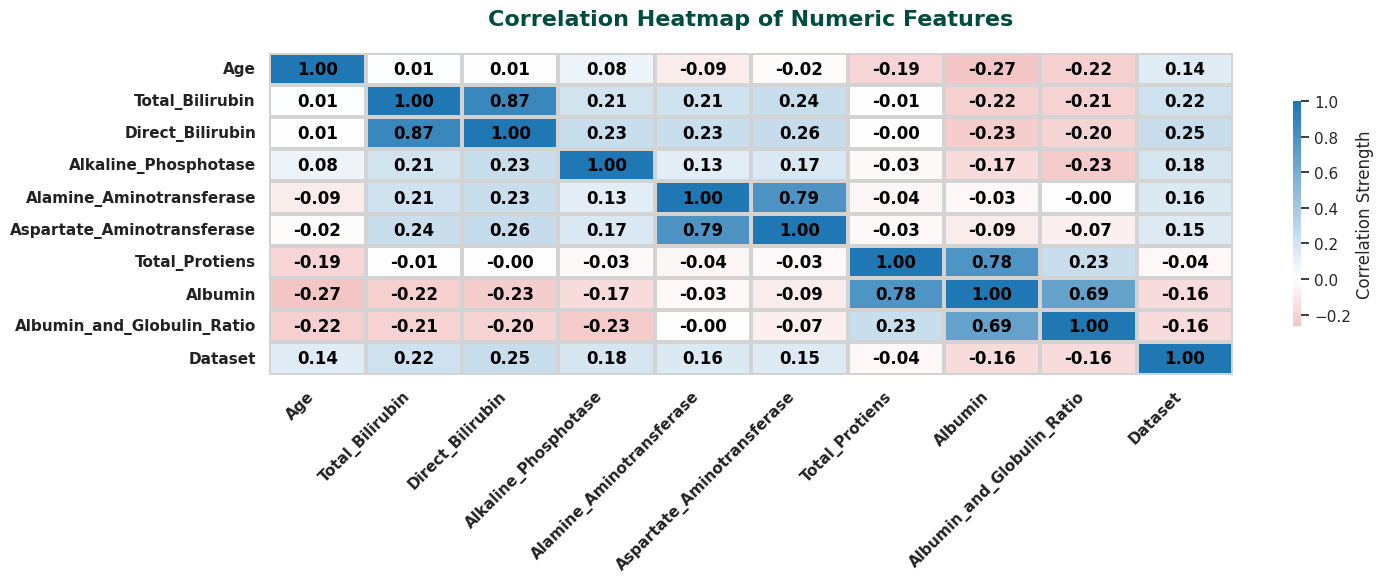

In [339]:
# ==== Correlation Heatmap visualization code ====

#MULTIVARIATE EDA

num_cols = df.select_dtypes(include='number')

custom_cmap = sns.color_palette("blend:#d62728,white,#1f77b4", as_cmap=True)
plt.figure(figsize=(15,6))
sns.heatmap(
    num_cols.corr(),
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    center=0,
    linewidths=1.5,
    linecolor="lightgrey",
    annot_kws={"size":12, "weight":"bold", "color":"black"},
    cbar_kws={"shrink":0.7, "aspect":30, "label":"Correlation Strength"}
)

plt.title("Correlation Heatmap of Numeric Features",
          fontsize=16, fontweight="bold", color="#004d40", pad=20)
plt.xticks(rotation=45, ha="right", fontsize=11, weight="bold", color="#222")
plt.yticks(rotation=0, fontsize=11, weight="bold", color="#222")
plt.grid(False)
plt.tight_layout()
plt.show()

### Strong Positive Correlations

| Feature 1                | Feature 2                  | Correlation (r) | Interpretation                                            |
| ------------------------ | -------------------------- | --------------- | --------------------------------------------------------- |
| Total_Bilirubin          | Direct_Bilirubin           | **0.87**        | Direct bilirubin is a major component of total bilirubin  |
| Alamine_Aminotransferase | Aspartate_Aminotransferase | **0.79**        | Both enzymes rise together during liver injury            |
| Total_Protiens           | Albumin                    | **0.78**        | Albumin contributes significantly to total protein levels |
| Albumin                  | Albumin_and_Globulin_Ratio | **0.68**        | A/G ratio depends heavily on albumin concentration        |


### Moderate Positive Correlations

| Feature 1            | Feature 2                  | Correlation (r) | Interpretation                                      |
| -------------------- | -------------------------- | --------------- | --------------------------------------------------- |
| Direct_Bilirubin     | Aspartate_Aminotransferase | 0.26            | Higher bilirubin often accompanies enzyme elevation |
| Direct_Bilirubin     | Alamine_Aminotransferase   | 0.24            | Indicates liver inflammation effects                |
| Total_Bilirubin      | Aspartate_Aminotransferase | 0.24            | Liver damage affects both bilirubin and enzymes     |
| Total_Bilirubin      | Alamine_Aminotransferase   | 0.22            | Moderate co-movement in liver dysfunction           |
| Alkaline_Phosphotase | Aspartate_Aminotransferase | 0.17            | Reflects bile duct and liver injury interaction     |


### Strong / Moderate Negative Correlations (with Target – Dataset)


| Feature                    | Dataset | Correlation (r) | Interpretation                                           |
| -------------------------- | ------- | --------------- | -------------------------------------------------------- |
| Direct_Bilirubin           | Dataset | **-0.25**       | Higher bilirubin strongly associated with liver patients |
| Total_Bilirubin            | Dataset | **-0.22**       | Elevated bilirubin linked to liver disease               |
| Alkaline_Phosphotase       | Dataset | **-0.19**       | Higher enzyme levels indicate liver dysfunction          |
| Alamine_Aminotransferase   | Dataset | **-0.16**       | Liver cell injury correlates with disease presence       |
| Aspartate_Aminotransferase | Dataset | **-0.15**       | Elevated AST reflects liver damage                       |



### Weak Positive Correlations (with Dataset)

| Feature                    | Dataset | Correlation (r) | Interpretation                                    |
| -------------------------- | ------- | --------------- | ------------------------------------------------- |
| Albumin                    | Dataset | 0.17            | Higher albumin associated with non-liver patients |
| Albumin_and_Globulin_Ratio | Dataset | 0.17            | Higher A/G ratio indicates healthier liver        |
| Total_Protiens             | Dataset | 0.04            | Very weak positive association                    |


### Weak or No Significant Correlations


| Feature 1      | Feature 2        | Correlation (r) | Interpretation                            |
| -------------- | ---------------- | --------------- | ----------------------------------------- |
| Age            | Total_Bilirubin  | 0.01            | Age has little effect on bilirubin levels |
| Age            | Direct_Bilirubin | 0.01            | Minimal age influence                     |
| Age            | Liver Enzymes    | ~0.00           | Age is not a strong biochemical driver    |
| Total_Protiens | Liver Enzymes    | ~0.00           | Protein levels weakly related to enzymes  |


### Overall Correlation Insights

* Bilirubin components and liver enzymes exhibit strong internal correlations, confirming biological consistency.

* Albumin-related features are strongly interdependent and represent liver synthetic function.

* The Dataset (target) shows its strongest correlations with bilirubin and enzyme features, validating them as key predictors.

* Age and total proteins show weak correlations, indicating limited standalone predictive value.

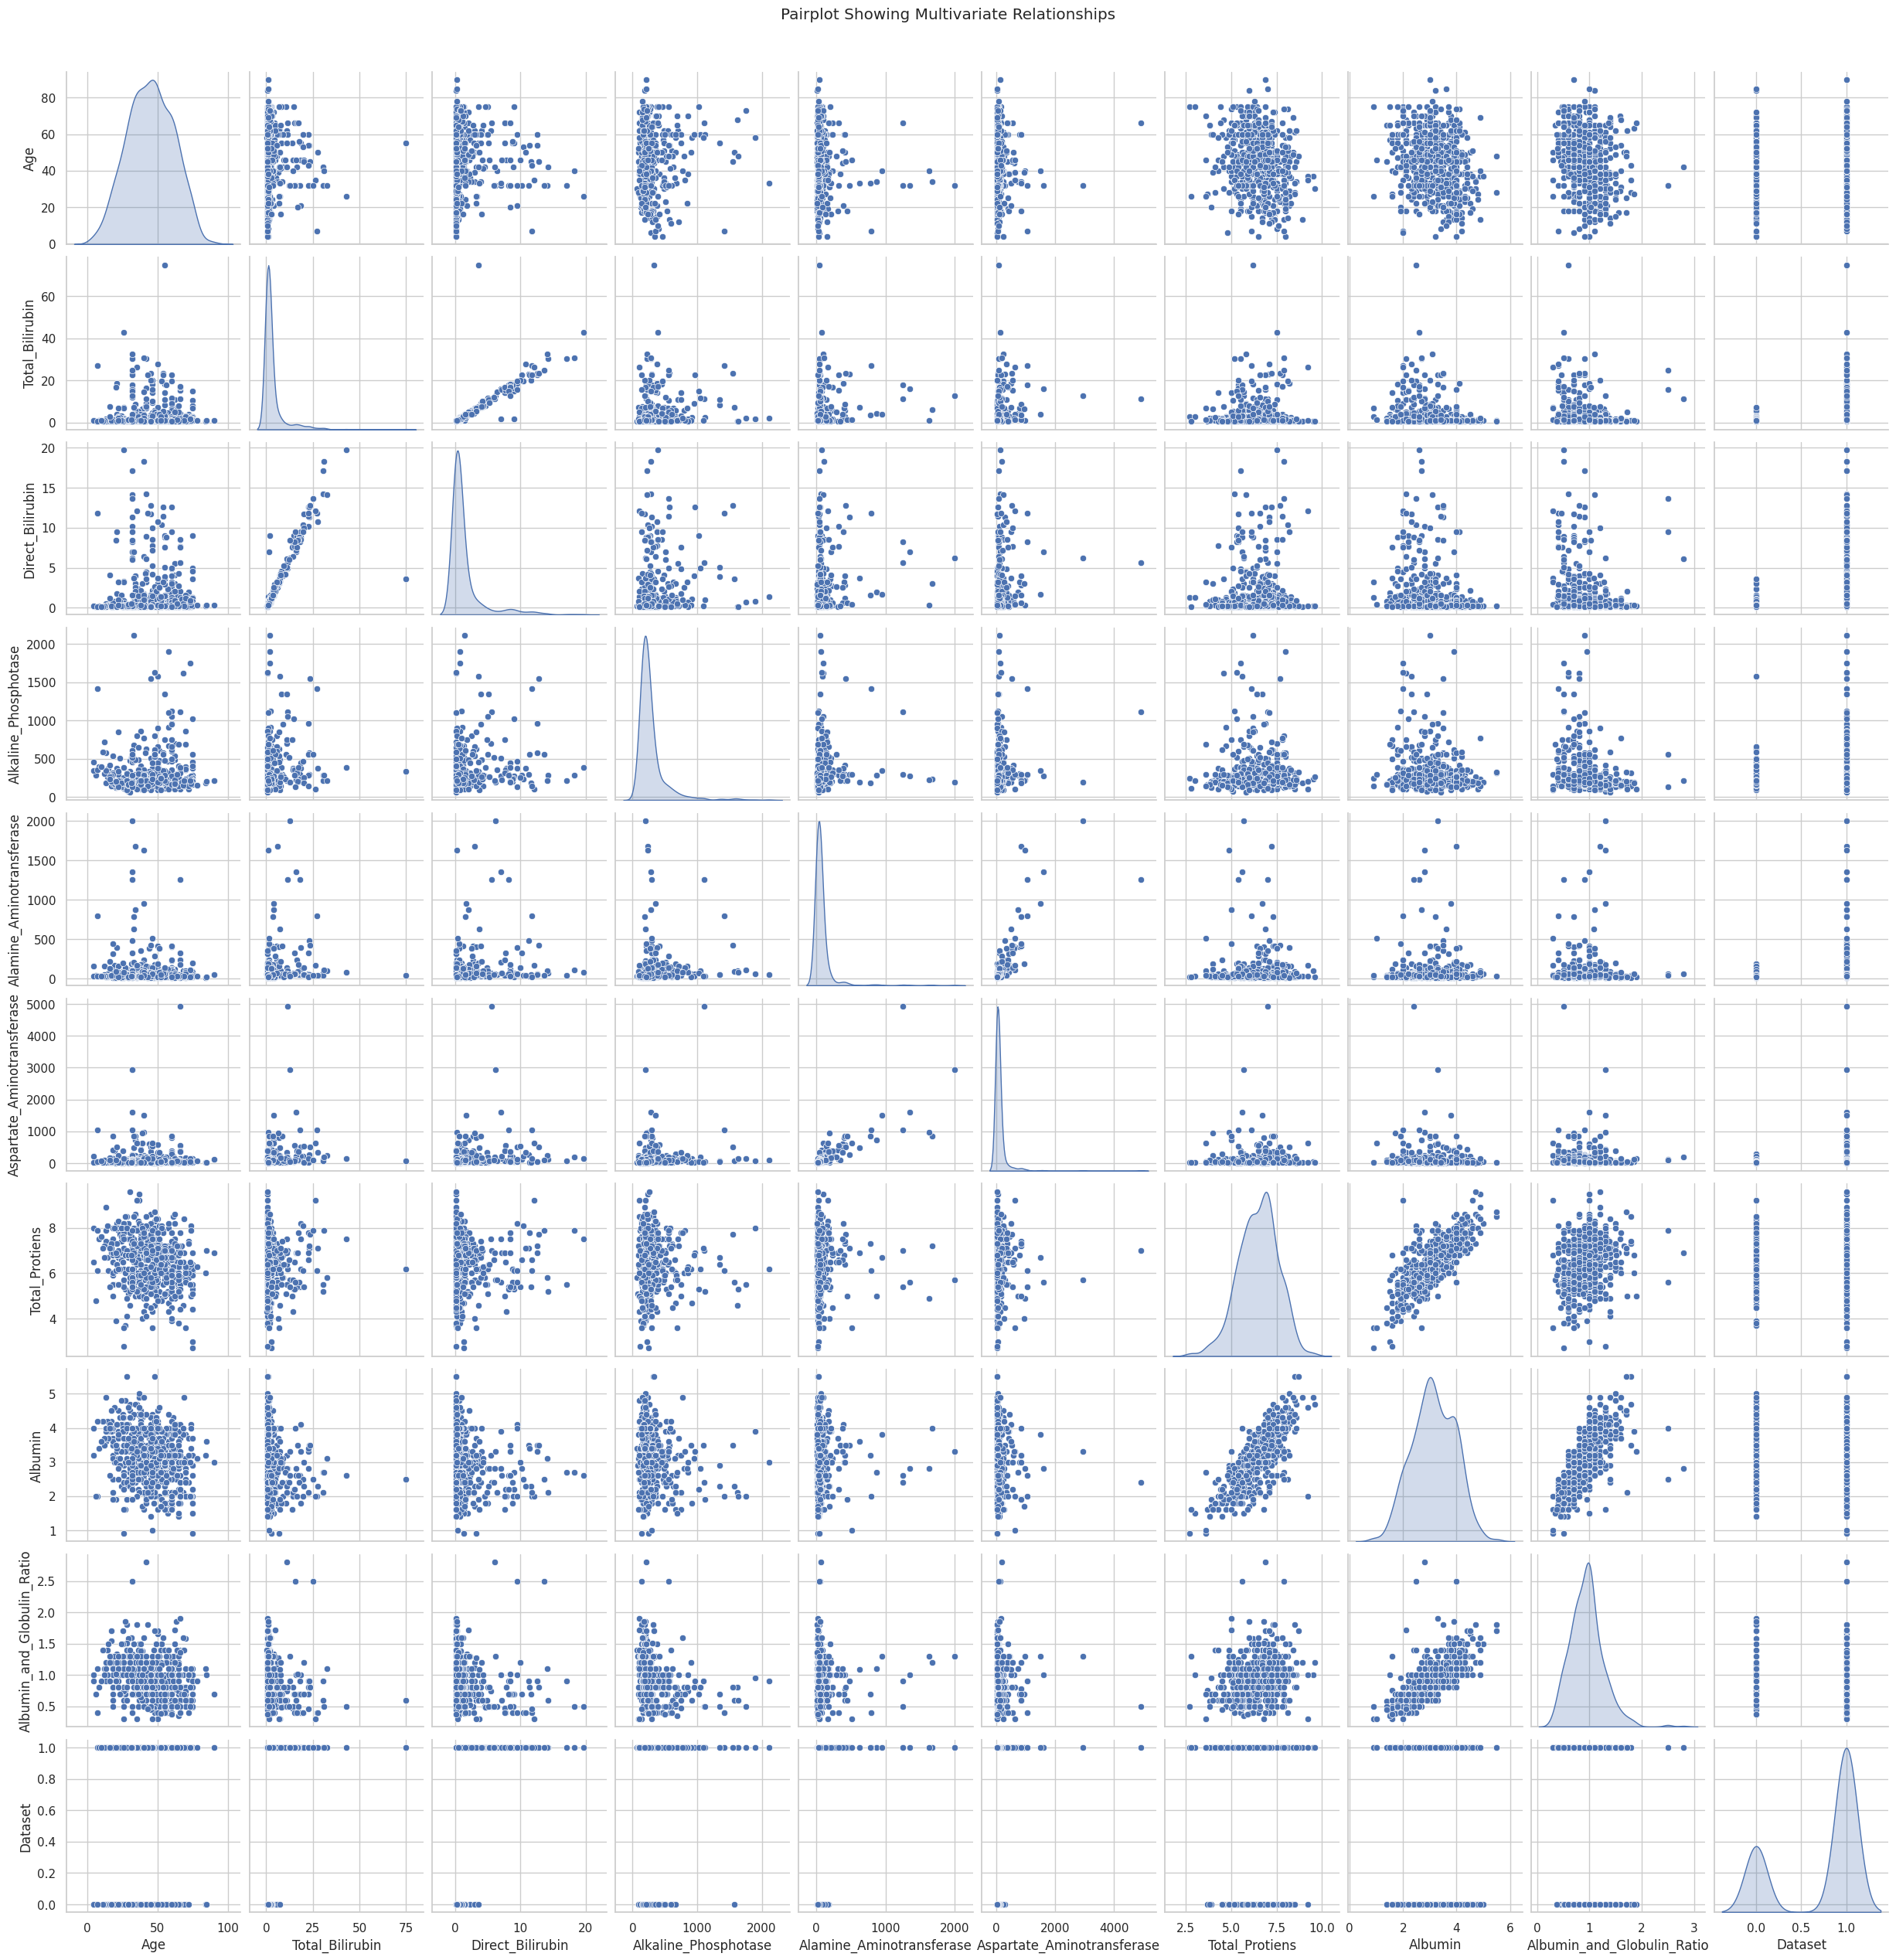

In [340]:
# ==== Pair Plot visualization code ====

num_cols = df.select_dtypes(include='number')

sns.pairplot(num_cols,diag_kind="kde")
plt.suptitle("Pairplot Showing Multivariate Relationships", y=1.02)
plt.show()

INSIGHTS:

• Total_Bilirubin and Direct_Bilirubin show strong positive correlation → possible multicollinearity.

• Albumin shows weak negative association with target → clinically meaningful.

• No single feature shows linear separability → non-linear models justified.

## **3.1 Hypothesis Testing**

Based on exploratory data analysis and visualization results, the following hypotheses are formulated to statistically validate the relationships between key clinical features and liver disease status (Dataset).



H0: The feature does not differ significantly between liver and non-liver patients

H1: The feature differs significantly between liver and non-liver patients

### 3.4.1 Hypothetical Statement

Hypothesis testing confirms that most biochemical features show statistically significant differences between liver and non-liver patients, supporting their importance in liver disease prediction.


#### Automatically applies:

* t-test → if data is normal

* Mann–Whitney U test → if data is skewed

In [341]:
from scipy.stats import mannwhitneyu
import pandas as pd

features = [
    'Age',
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkaline_Phosphotase',
    'Alamine_Aminotransferase',
    'Aspartate_Aminotransferase',
    'Total_Protiens',
    'Albumin',
    'Albumin_and_Globulin_Ratio'
]

results = []

for col in features:
    liver = df[df['Dataset'] == 1][col].dropna()
    non_liver = df[df['Dataset'] == 0][col].dropna()

    stat, p_value = mannwhitneyu(
        liver, non_liver, alternative='two-sided'
    )

    results.append({
        'Feature': col,
        'Test Used': 'Mann–Whitney U',
        'Test Statistic': round(stat, 3),
        'P-value': round(p_value, 5),
        'Conclusion': 'Reject H0 (Significant)'
                      if p_value < 0.05 else 'Fail to Reject H0 (Not Significant)'
    })

hypothesis_results = pd.DataFrame(results)
hypothesis_results


,Feature,Test Used,Test Statistic,P-value,Conclusion
0,Age,Mann–Whitney U,40481.5,0.00177,Reject H0 (Significant)
1,Total_Bilirubin,Mann–Whitney U,48163.5,0.00000,Reject H0 (Significant)
2,Direct_Bilirubin,Mann–Whitney U,47663.0,0.00000,Reject H0 (Significant)
3,Alkaline_Phosphotase,Mann–Whitney U,46856.5,0.00000,Reject H0 (Significant)
4,Alamine_Aminotransferase,Mann–Whitney U,47629.0,0.00000,Reject H0 (Significant)
5,Aspartate_Aminotransferase,Mann–Whitney U,48437.0,0.00000,Reject H0 (Significant)
6,Total_Protiens,Mann–Whitney U,33307.5,0.43715,Fail to Reject H0 (Not Significant)
7,Albumin,Mann–Whitney U,27331.0,0.00006,Reject H0 (Significant)
8,Albumin_and_Globulin_Ratio,Mann–Whitney U,25961.0,0.00001,Reject H0 (Significant)


#### Why Not Chi-square Test for Liver Prediction Features?

>The majority of features in the liver patient dataset (such as Age, Bilirubin levels, Liver enzymes, Proteins, and Albumin ratios) are numerical, while the target variable Dataset is categorical (Liver vs Non-Liver).

>The Chi-square test is only suitable when both variables are categorical, which is not the case here. Therefore, Chi-square is not appropriate for testing the relationship between these numerical clinical features and liver disease status.

#### Instead, for Numerical Feature vs Dataset, We Should Use:

>Independent Samples t-test
→ When the numerical feature is approximately normally distributed
(e.g., Age, Albumin)

>Mann–Whitney U Test
→ When the numerical feature is skewed or contains outliers
(e.g., Total_Bilirubin, Direct_Bilirubin, ALT, AST)

These tests compare whether the central tendency of a feature differs significantly between liver and non-liver patients.

#### Clinical Insight (from Hypothesis Testing):

Higher values of bilirubin and liver enzymes and lower values of albumin-related features are statistically significant indicators of liver disease. Hypothesis testing confirms that these biochemical markers differ meaningfully between liver and non-liver patients.

#### Business / Clinical Impact:

* Statistically significant features help prioritize critical medical tests.

* Early identification of abnormal bilirubin and enzyme levels supports faster diagnosis and treatment planning.

* Healthcare providers can focus on high-impact biomarkers rather than relying on demographic factors like age alone.

#### Example Interpretation:

Patients with elevated bilirubin and liver enzyme levels are significantly more likely to have liver disease. Therefore, focusing on these biochemical indicators can improve early detection and reduce diagnostic delays.

### Conclusion:

Since liver prediction features are numerical and the target is categorical, t-tests and Mann–Whitney U tests are appropriate, while Chi-square tests are not suitable.

# 4. DATA PREPROCESSING

In [342]:
# ==== Finding a missing values ====
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


Four missing values in Albumin_and_Globulin_Ratio were imputed using the median to preserve distribution and reduce outlier impact.

In [343]:
# ==== Check duplicate values ====
# ==== Total number of rows ====
total_rows = len(df)

# ==== Count duplicate rows ====
duplicate_count = df.duplicated().sum()

# ==== Percentage of duplicates ====
duplicate_percentage = (duplicate_count / total_rows) * 100

print(f"Total Rows: {total_rows}")
print(f"Duplicate Rows: {duplicate_count}")
print(f"Percentage of Duplicates: {duplicate_percentage:.2f}%")

Total Rows: 583
Duplicate Rows: 13
Percentage of Duplicates: 2.23%


In [344]:
# ==== Drop exact duplicates ====
df = df.drop_duplicates()

Out of 583 records, 13 duplicate entries (2.23%) were removed to eliminate redundancy and prevent model bias, resulting in 570 unique patient records and improved data quality for modeling.

In [345]:
# ==== Defining the function for outlier detection and percentage calculation using IQR ====

def detect_outliers(df):
    data = np.array(df)

    # ==== Quartiles ====
    q1 = np.quantile(data, 0.25)
    q2 = np.quantile(data, 0.50)
    q3 = np.quantile(data, 0.75)

    # ==== IQR & boundsa ====
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # ==== Outlier detection ====
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = round(outlier_count * 100 / len(data), 2)

    # ==== Display results ====
    print(f"Q1 = {q1}, Q2 (Median) = {q2:.2f}, Q3 = {q3}")
    print(f"IQR = {IQR:.2f}")
    print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")
    print(f"Outliers Detected: {outlier_count}")
    print(f"Outlier Percentage: {outlier_percent}%\n")

    # ==== Calculating IQR, Lower/Upper Bounds, and Outlier Counts for Continuous Numerical Features ====

# Get only numerical columns to apply outlier detection
for feature in df.select_dtypes(include=np.number).columns:
  print(feature,":")
  detect_outliers(df[feature])
  print("-"*50)

Age :
Q1 = 33.0, Q2 (Median) = 45.00, Q3 = 58.0
IQR = 25.00
Lower Bound = -4.50, Upper Bound = 95.50
Outliers Detected: 0
Outlier Percentage: 0.0%

--------------------------------------------------
Total_Bilirubin :
Q1 = 0.8, Q2 (Median) = 1.00, Q3 = 2.6
IQR = 1.80
Lower Bound = -1.90, Upper Bound = 5.30
Outliers Detected: 83
Outlier Percentage: 14.56%

--------------------------------------------------
Direct_Bilirubin :
Q1 = 0.2, Q2 (Median) = 0.30, Q3 = 1.3
IQR = 1.10
Lower Bound = -1.45, Upper Bound = 2.95
Outliers Detected: 80
Outlier Percentage: 14.04%

--------------------------------------------------
Alkaline_Phosphotase :
Q1 = 176.0, Q2 (Median) = 208.00, Q3 = 298.0
IQR = 122.00
Lower Bound = -7.00, Upper Bound = 481.00
Outliers Detected: 69
Outlier Percentage: 12.11%

--------------------------------------------------
Alamine_Aminotransferase :
Q1 = 23.0, Q2 (Median) = 35.00, Q3 = 60.0
IQR = 37.00
Lower Bound = -32.50, Upper Bound = 115.50
Outliers Detected: 72
Outlier Perc

| **Feature Name**                     | **Description**                       | **Outlier %** | **Action Taken** | **Reason**                                                                                |
| ------------------------------------ | ------------------------------------- | ------------- | ---------------- | ----------------------------------------------------------------------------------------- |
| **Age**                              | Patient age in years                  | **0.0%**      | No action        | No outliers detected; age is naturally bounded and clinically valid                       |
| **Total_Bilirubin**                  | Total bilirubin level in blood        | **14.56%**    | Retained         | High values indicate liver dysfunction; removing would lose critical clinical information |
| **Direct_Bilirubin**                 | Direct bilirubin level                | **14.04%**    | Retained         | Outliers represent severe liver conditions and are medically meaningful                   |
| **Alkaline_Phosphotase**             | Enzyme related to bile duct function  | **12.11%**    | Retained         | Elevated values are expected in liver and bile duct disorders                             |
| **Alamine_Aminotransferase (ALT)**   | Liver cell injury enzyme              | **12.63%**    | Retained         | High enzyme levels indicate liver damage; not noise                                       |
| **Aspartate_Aminotransferase (AST)** | Liver inflammation enzyme             | **11.58%**    | Retained         | Extreme values correspond to severe liver disease                                         |
| **Total_Protiens**                   | Total protein level in blood          | **1.40%**     | Retained         | Very few outliers; values are clinically plausible                                        |
| **Albumin**                          | Protein synthesized by liver          | **0.0%**      | No action        | No outliers; distribution is stable                                                       |
| **Albumin_and_Globulin_Ratio**       | Indicator of liver synthetic function | **1.75%**     | Retained         | Minor outliers; clinically relevant indicator                                             |
| **Dataset**                          | Target variable (Liver / Non-Liver)   | **0.0%**      | No action        | Categorical target; outlier concept not applicable                                        |


In [346]:
col_to_clip = [
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkaline_Phosphotase',
    'Alamine_Aminotransferase',
    'Aspartate_Aminotransferase'
]

# Keep original data
df_before = df.copy()
df_after = df.copy()

def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df

# Apply clipping only to the specified columns
for feature_name in col_to_clip:
    df = outliers(df, feature_name)

# 5. PIPELINE + COLUMN TRANSFORMER

In [347]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [348]:
#========Define Feature Groups=======
#========Only for features columns=====
num_cols=['Age', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase','Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']
cat_cols=['Gender']

In [349]:
#==========Numeric Pipeline==========
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,FunctionTransformer

smote = SMOTE(random_state=42)

num_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('log',FunctionTransformer(np.log1p,validate=False)),
    ('scaler',StandardScaler())
])

In [350]:
#======Categorical Pipeline========
cat_pipeline=Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('scaler', StandardScaler())
])

In [351]:
#=======Column Transformer=========
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(transformers=[
    ('num',num_pipeline,num_cols),
    ('cat',cat_pipeline,cat_cols)
])

# 6. FINAL ML PIPELINE

In [352]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

smote_instance = SMOTE(random_state=42)

pipelines = {
    'RandomForest': Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('smote', smote_instance),
        ('classifier', RandomForestClassifier(
            n_estimators=200,
            random_state=42,
            class_weight={0: 1, 1: 3}
        ))
    ]),
    'LogisticRegression': Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('smote', smote_instance),
        ('classifier', LogisticRegression(
            C=5,
            max_iter=1000,
            random_state=42,
            class_weight={0: 1, 1: 3},
            solver='liblinear'
        ))
    ]),
    'DecisionTree': Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('smote', smote_instance),
        ('classifier', DecisionTreeClassifier(
            criterion='gini',
            splitter='best',
            random_state=42
        ))
    ]),
    'SVC': Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('smote', smote_instance),
        ('classifier', SVC(
            kernel='rbf',
            C=1.0,
            gamma='scale',
            probability=True, # Required for 'roc_auc' scoring
            random_state=42 # Added random_state for reproducibility
        ))
    ]),
    'XGBoost': Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('smote', smote_instance),
        ('classifier', XGBClassifier(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
        ))
    ])
}

In [353]:
# Convert 'Gender' to categorical type explicitly
df['Gender'] = df['Gender'].astype('category')

#=======Train & Test Split=======
x=df.drop('Dataset',axis=1)
y=df.Dataset

In [354]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [355]:
#=======Cross-Validiation for all models========
from sklearn.model_selection import cross_val_score

results = {}

for model_name, pipeline in pipelines.items():
    print(f"Performing cross-validation for {model_name}...")
    cv_scores = cross_val_score(
        pipeline,
        x_train,
        y_train,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )
    results[model_name] = {
        'ROC-AUC_mean': cv_scores.mean(),
        'ROC-AUC_std': cv_scores.std(),
        'CV_Scores': cv_scores
    }
    print(f"{model_name} CV ROC-AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})\n")

print("\n--- Cross-Validation Results Summary ---")
for model_name, metrics in results.items():
    print(f"{model_name}: Mean ROC-AUC = {metrics['ROC-AUC_mean']:.4f} (Std = {metrics['ROC-AUC_std']:.4f})")

Performing cross-validation for RandomForest...
RandomForest CV ROC-AUC: 0.6971 (+/- 0.0415)

Performing cross-validation for LogisticRegression...
LogisticRegression CV ROC-AUC: 0.7232 (+/- 0.0259)

Performing cross-validation for DecisionTree...
DecisionTree CV ROC-AUC: 0.5571 (+/- 0.0475)

Performing cross-validation for SVC...
SVC CV ROC-AUC: 0.7029 (+/- 0.0323)

Performing cross-validation for XGBoost...
XGBoost CV ROC-AUC: 0.6719 (+/- 0.0485)


--- Cross-Validation Results Summary ---
RandomForest: Mean ROC-AUC = 0.6971 (Std = 0.0415)
LogisticRegression: Mean ROC-AUC = 0.7232 (Std = 0.0259)
DecisionTree: Mean ROC-AUC = 0.5571 (Std = 0.0475)
SVC: Mean ROC-AUC = 0.7029 (Std = 0.0323)
XGBoost: Mean ROC-AUC = 0.6719 (Std = 0.0485)



Evaluating Model: RandomForest

Classification Report:


,precision,recall,f1-score,support
0,0.60,0.09,0.16,33.00
1,0.72,0.98,0.83,81.00
accuracy,0.72,0.72,0.72,0.72
macro avg,0.66,0.53,0.49,114.00
weighted avg,0.69,0.72,0.64,114.00


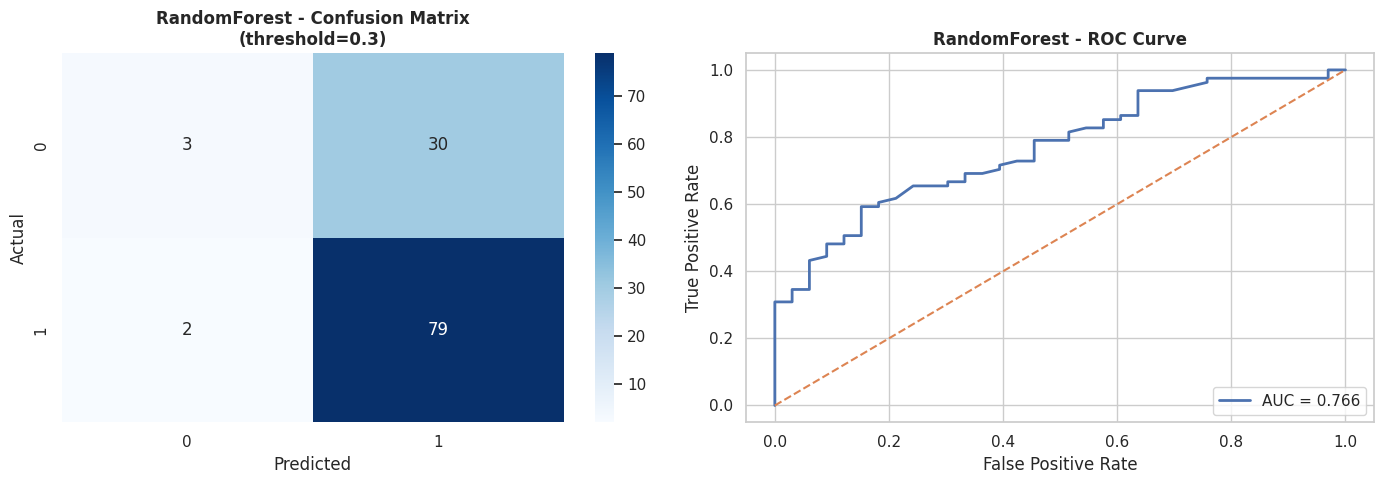

Test ROC-AUC: 0.7662

Evaluating Model: LogisticRegression

Classification Report:


,precision,recall,f1-score,support
0,1.00,0.03,0.06,33.00
1,0.72,1.00,0.84,81.00
accuracy,0.72,0.72,0.72,0.72
macro avg,0.86,0.52,0.45,114.00
weighted avg,0.80,0.72,0.61,114.00


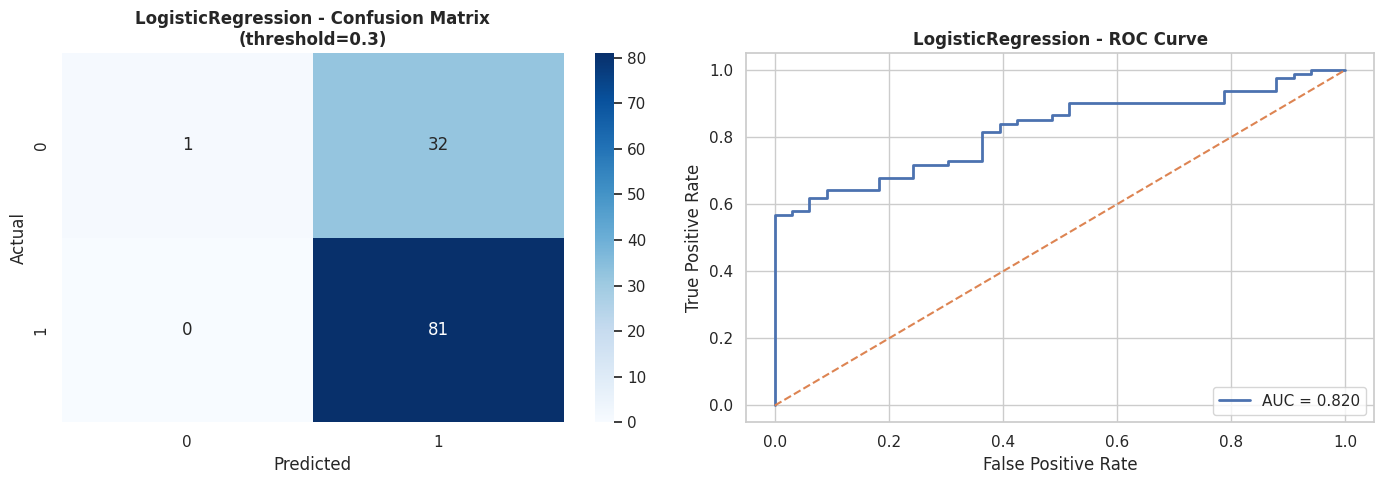

Test ROC-AUC: 0.8197

Evaluating Model: DecisionTree

Classification Report:


,precision,recall,f1-score,support
0,0.44,0.45,0.45,33.00
1,0.78,0.77,0.77,81.00
accuracy,0.68,0.68,0.68,0.68
macro avg,0.61,0.61,0.61,114.00
weighted avg,0.68,0.68,0.68,114.00


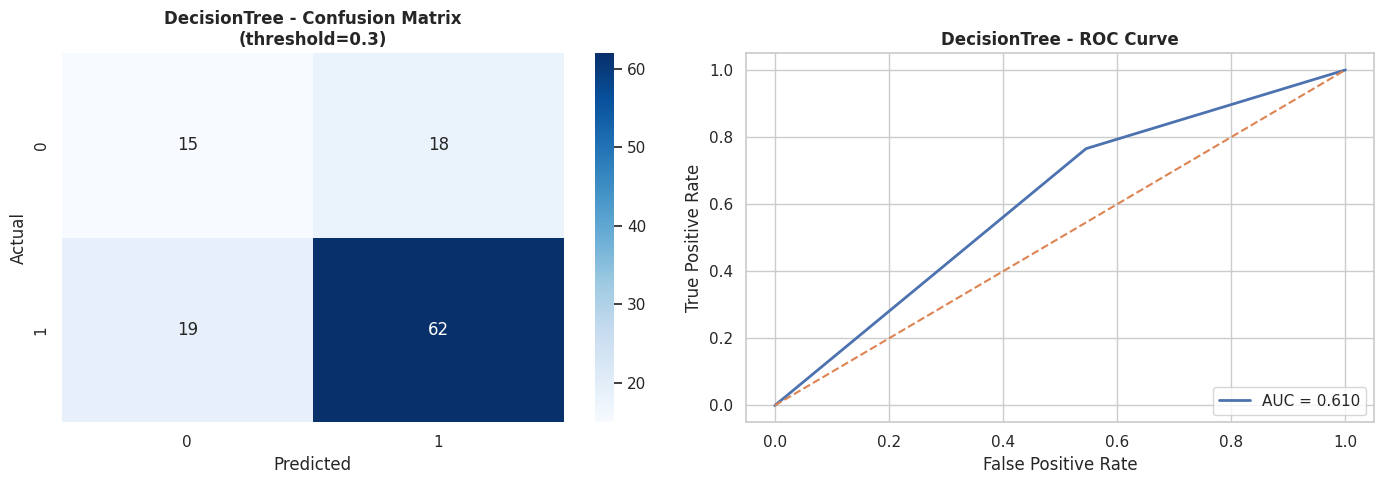

Test ROC-AUC: 0.6100

Evaluating Model: SVC

Classification Report:


,precision,recall,f1-score,support
0,0.71,0.36,0.48,33.00
1,0.78,0.94,0.85,81.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.74,0.65,0.67,114.00
weighted avg,0.76,0.77,0.75,114.00


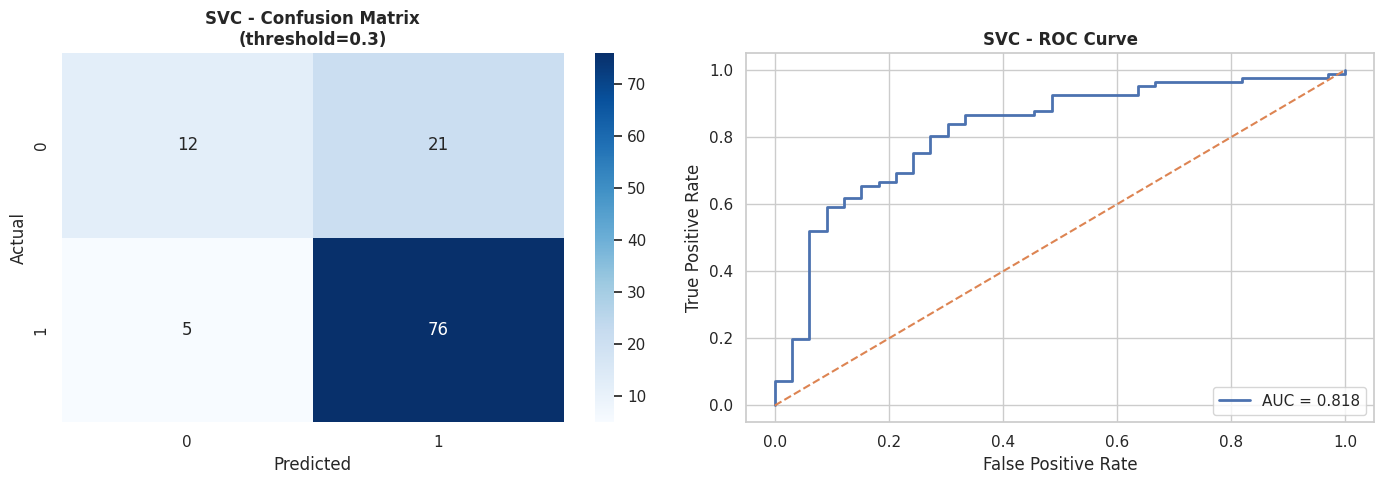

Test ROC-AUC: 0.8182

Evaluating Model: XGBoost

Classification Report:


,precision,recall,f1-score,support
0,0.50,0.12,0.20,33.00
1,0.73,0.95,0.82,81.00
accuracy,0.71,0.71,0.71,0.71
macro avg,0.61,0.54,0.51,114.00
weighted avg,0.66,0.71,0.64,114.00


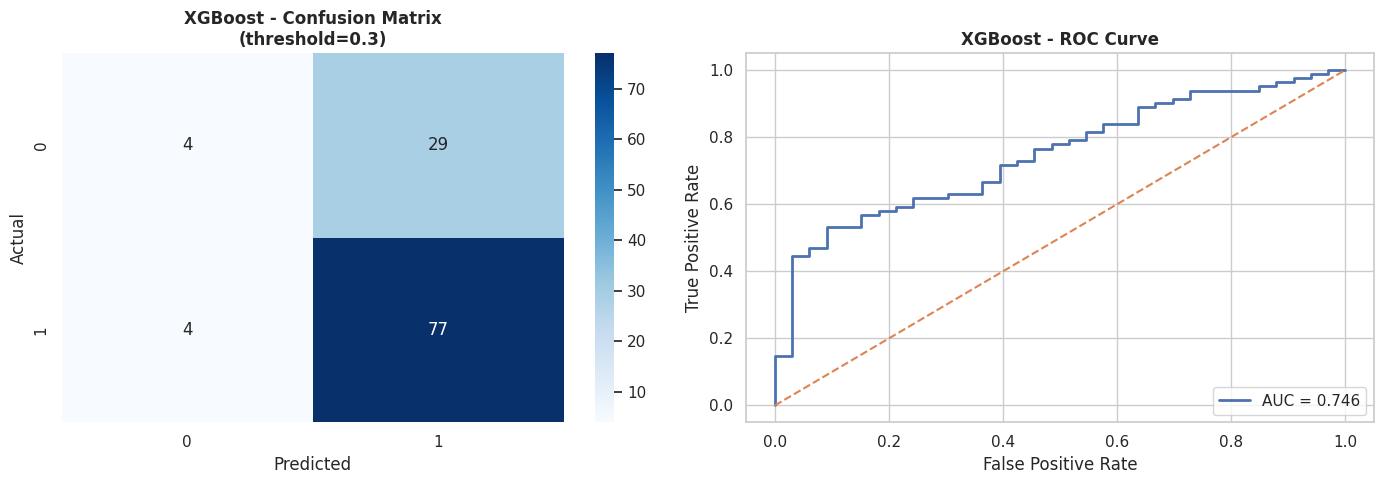

Test ROC-AUC: 0.7464


In [356]:
#=========FINDING THE BEST MODEL===============


from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

threshold = 0.3

for model_name, pipeline in pipelines.items():
    print("\n" + "=" * 80)
    print(f"Evaluating Model: {model_name}")
    print("=" * 80)

    # ------------------ Fit Model ------------------
    pipeline.fit(x_train, y_train)

    # ------------------ Predictions ------------------
    y_proba = pipeline.predict_proba(x_test)[:, 1]
    y_pred_custom = (y_proba >= threshold).astype(int)

    # ------------------ Classification Report ------------------
    report = classification_report(
        y_test,
        y_pred_custom,
        output_dict=True
    )
    report_df = pd.DataFrame(report).transpose()

    print("\nClassification Report:")
    display(report_df.round(2))

    # ------------------ Confusion Matrix & ROC (One Row) ------------------
    cm = confusion_matrix(y_test, y_pred_custom)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # ---- Confusion Matrix ----
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=axes[0]
    )
    axes[0].set_title(f"{model_name} - Confusion Matrix\n(threshold={threshold})",
                      fontsize=12, fontweight='bold')
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    # ---- ROC Curve ----
    axes[1].plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.3f}")
    axes[1].plot([0, 1], [0, 1], linestyle='--')
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].set_title(f"{model_name} - ROC Curve",
                      fontsize=12, fontweight='bold')
    axes[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    print(f"Test ROC-AUC: {roc_auc:.4f}")


# 7. HYPER TUNNING WITH GRIDSEARCH CV

In [357]:
param_grids = {

    'RandomForest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 5, 10],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2]
    },

    'LogisticRegression': {
        'classifier__C': [0.1, 1, 5, 10],
        'classifier__penalty': ['l1', 'l2']
    },

    'DecisionTree': {
        'classifier__max_depth': [None, 5, 10],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 5]
    },

    'SVC': {
        'classifier__C': [0.1, 1, 5, 10],
        'classifier__gamma': ['scale', 0.1, 0.01]
    },

    'XGBoost': {
        'classifier__n_estimators': [200, 300],
        'classifier__max_depth': [3, 4, 5],
        'classifier__learning_rate': [0.03, 0.05],
        'classifier__subsample': [0.8, 1.0],
        'classifier__colsample_bytree': [0.8, 1.0]
    }
}


In [358]:
from sklearn.model_selection import GridSearchCV

best_models = {}
grid_results = []

for model_name, pipeline in pipelines.items():
    print("\n" + "=" * 80)
    print(f"Hyperparameter Tuning: {model_name}")
    print("=" * 80)

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[model_name],
        scoring='roc_auc',
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(x_train, y_train)

    # Save best model
    best_models[model_name] = grid.best_estimator_

    # Store summary
    grid_results.append({
        'Model': model_name,
        'Best ROC-AUC (CV)': grid.best_score_,
        'Best Params': grid.best_params_
    })

    print(f"Best ROC-AUC: {grid.best_score_:.4f}")
    print("Best Parameters:")
    print(grid.best_params_)



Hyperparameter Tuning: RandomForest
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best ROC-AUC: 0.6983
Best Parameters:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}

Hyperparameter Tuning: LogisticRegression
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best ROC-AUC: 0.7245
Best Parameters:
{'classifier__C': 0.1, 'classifier__penalty': 'l2'}

Hyperparameter Tuning: DecisionTree
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best ROC-AUC: 0.6307
Best Parameters:
{'classifier__max_depth': 5, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2}

Hyperparameter Tuning: SVC
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best ROC-AUC: 0.7300
Best Parameters:
{'classifier__C': 0.1, 'classifier__gamma': 0.01}

Hyperparameter Tuning: XGBoost
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best ROC-AUC: 0.6794
Best 


Final Evaluation (Tuned): RandomForest
              precision    recall  f1-score   support

           0       0.50      0.03      0.06        33
           1       0.71      0.99      0.83        81

    accuracy                           0.71       114
   macro avg       0.61      0.51      0.44       114
weighted avg       0.65      0.71      0.61       114



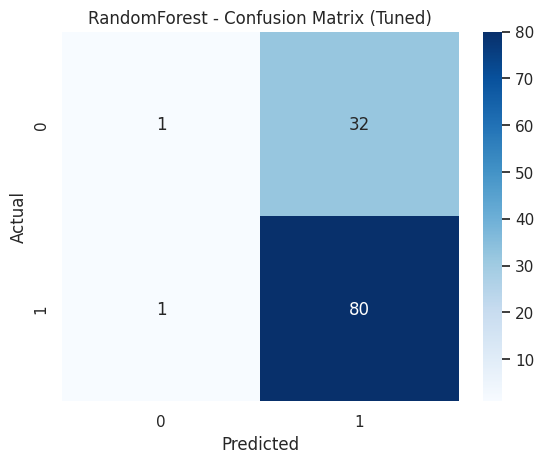


Final Evaluation (Tuned): LogisticRegression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.71      1.00      0.83        81

    accuracy                           0.71       114
   macro avg       0.36      0.50      0.42       114
weighted avg       0.50      0.71      0.59       114



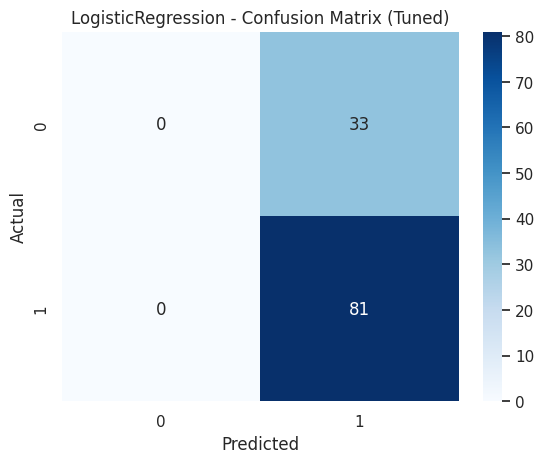


Final Evaluation (Tuned): DecisionTree
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        33
           1       0.83      0.83      0.83        81

    accuracy                           0.75       114
   macro avg       0.70      0.70      0.70       114
weighted avg       0.75      0.75      0.75       114



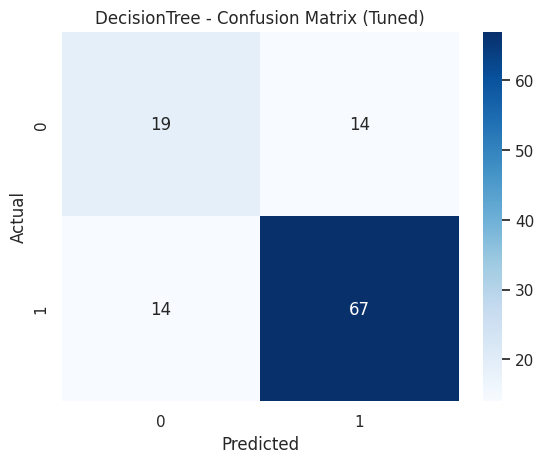


Final Evaluation (Tuned): SVC
              precision    recall  f1-score   support

           0       0.57      0.39      0.46        33
           1       0.78      0.88      0.83        81

    accuracy                           0.74       114
   macro avg       0.67      0.64      0.64       114
weighted avg       0.72      0.74      0.72       114



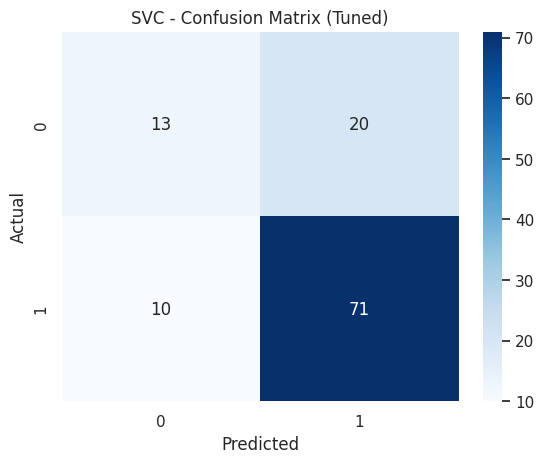


Final Evaluation (Tuned): XGBoost
              precision    recall  f1-score   support

           0       0.60      0.09      0.16        33
           1       0.72      0.98      0.83        81

    accuracy                           0.72       114
   macro avg       0.66      0.53      0.49       114
weighted avg       0.69      0.72      0.64       114



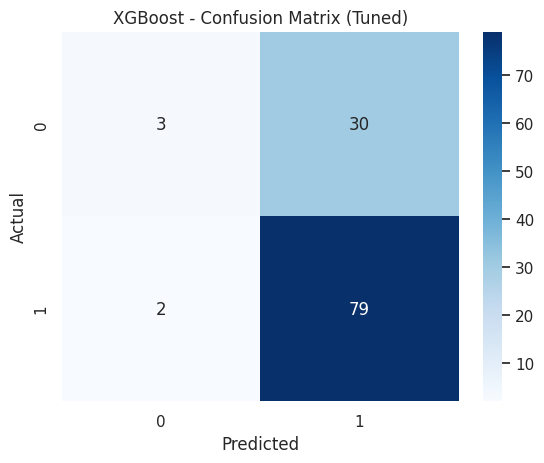

In [359]:
#============FINDING THE BEST MODEL USING HYPER TUNNING WITH GRIDSEARCH CV=============

from sklearn.metrics import confusion_matrix, classification_report

threshold = 0.3

for model_name, model in best_models.items():
    print("\n" + "=" * 80)
    print(f"Final Evaluation (Tuned): {model_name}")
    print("=" * 80)

    y_proba = model.predict_proba(x_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix (Tuned)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# 8. MODEL PERFORMANCE COMPARISON TABLE

In [360]:
stored_results = {}

threshold = 0.3

for model_name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)

    y_proba = pipeline.predict_proba(x_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    stored_results[model_name] = {
        "y_proba": y_proba,
        "y_pred": y_pred
    }

rows = []

for model_name, preds in stored_results.items():
    y_proba = preds["y_proba"]
    y_pred = preds["y_pred"]

    rows.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score (Liver)": f1_score(y_test, y_pred, pos_label=1),
        "Recall (Liver)": recall_score(y_test, y_pred, pos_label=1),
        "Recall (Non-Liver)": recall_score(y_test, y_pred, pos_label=0),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

df_results = pd.DataFrame(rows).sort_values(
    by="F1 Score (Liver)", ascending=False
)

display(df_results.round(3))


,Model,Accuracy,F1 Score (Liver),Recall (Liver),Recall (Non-Liver),ROC-AUC
3,SVC,0.772,0.854,0.938,0.364,0.818
1,LogisticRegression,0.719,0.835,1.000,0.030,0.820
0,RandomForest,0.719,0.832,0.975,0.091,0.766
4,XGBoost,0.711,0.824,0.951,0.121,0.746
2,DecisionTree,0.675,0.770,0.765,0.455,0.610


Model predictions were stored after evaluation and reused for metric comparison to avoid redundant model training.


# 10. FINAL - BEST ML MODEL

Final Model: SVC (Without Hyperparameter Tuning)
              precision    recall  f1-score   support

           0       0.71      0.36      0.48        33
           1       0.78      0.94      0.85        81

    accuracy                           0.77       114
   macro avg       0.74      0.65      0.67       114
weighted avg       0.76      0.77      0.75       114

**********************************************************************
Final Model: SVC (With Hyperparameter Tuning)
              precision    recall  f1-score   support

           0       0.57      0.39      0.46        33
           1       0.78      0.88      0.83        81

    accuracy                           0.74       114
   macro avg       0.67      0.64      0.64       114
weighted avg       0.72      0.74      0.72       114



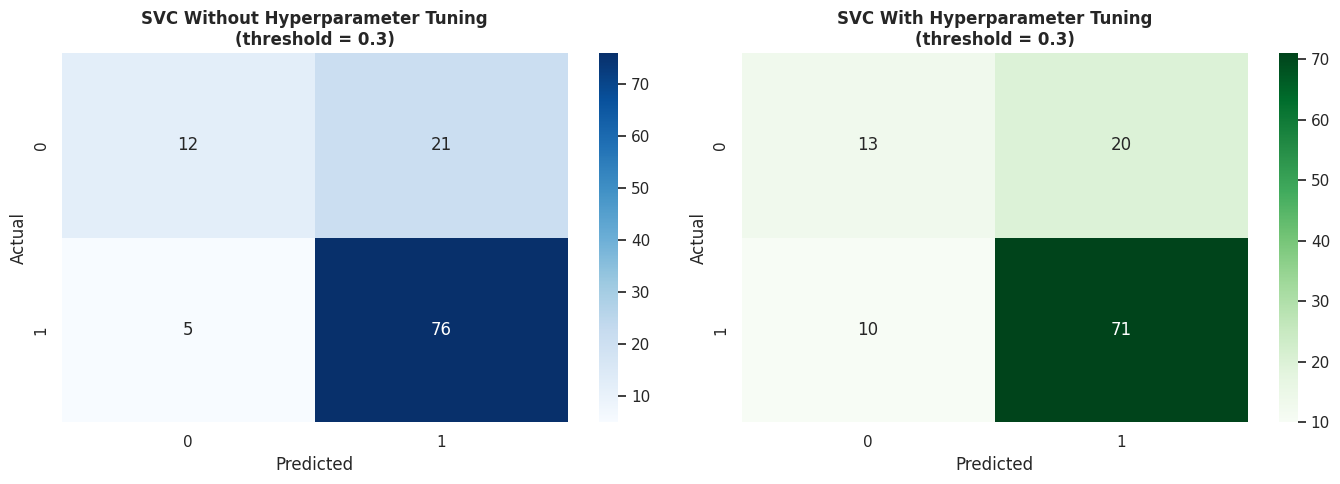

In [361]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

threshold = 0.3

# ================== WITHOUT HYPERPARAMETER TUNING ==================
svc_base = pipelines['SVC']
svc_base.fit(x_train, y_train)

y_proba_base = svc_base.predict_proba(x_test)[:, 1]
y_pred_base = (y_proba_base >= threshold).astype(int)

print("Final Model: SVC (Without Hyperparameter Tuning)")
print(classification_report(y_test, y_pred_base))

cm_base = confusion_matrix(y_test, y_pred_base)

print("*" * 70)

# ================== WITH HYPERPARAMETER TUNING ==================
svc_tuned = best_models['SVC']

y_proba_tuned = svc_tuned.predict_proba(x_test)[:, 1]
y_pred_tuned = (y_proba_tuned >= threshold).astype(int)

print("Final Model: SVC (With Hyperparameter Tuning)")
print(classification_report(y_test, y_pred_tuned))

cm_tuned = confusion_matrix(y_test, y_pred_tuned)

# ================== SIDE-BY-SIDE CONFUSION MATRICES ==================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ---- Without Tuning ----
sns.heatmap(
    cm_base,
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=axes[0]
)
axes[0].set_title("SVC Without Hyperparameter Tuning\n(threshold = 0.3)",
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# ---- With Tuning ----
sns.heatmap(
    cm_tuned,
    annot=True,
    fmt='d',
    cmap='Greens',
    ax=axes[1]
)
axes[1].set_title("SVC With Hyperparameter Tuning\n(threshold = 0.3)",
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [362]:
best_model_name = df_results.iloc[0]["Model"]
print("BEST MODEL SELECTED:", best_model_name)


# Combine untuned and tuned models into one registry
model_registry = {}

# Add untuned pipelines to the registry
for name, pipeline in pipelines.items():
    model_registry[name] = pipeline

# Add tuned pipelines to the registry with a '(Tuned)' suffix
for name, tuned_pipeline in best_models.items():
    model_registry[f"{name} (Tuned)"] = tuned_pipeline


best_model = model_registry[best_model_name]

BEST MODEL SELECTED: SVC


The best-performing model was selected automatically based on the evaluation metrics table and retrieved from a centralized model registry to avoid hard-coded conditional logic.


# 11. FEATURE IMPORTANCE ANALYSIS

In [363]:
from sklearn.inspection import permutation_importance


# Use the FINAL selected model (SVC)
model_for_importance = best_model  # SVC (untuned or tuned)

# Compute permutation importance
perm_importance = permutation_importance(
    model_for_importance,
    x_test,
    y_test,
    scoring='roc_auc',   # medical-relevant metric
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)


In [364]:
feature_importance_df = pd.DataFrame({
    "Feature": x.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)


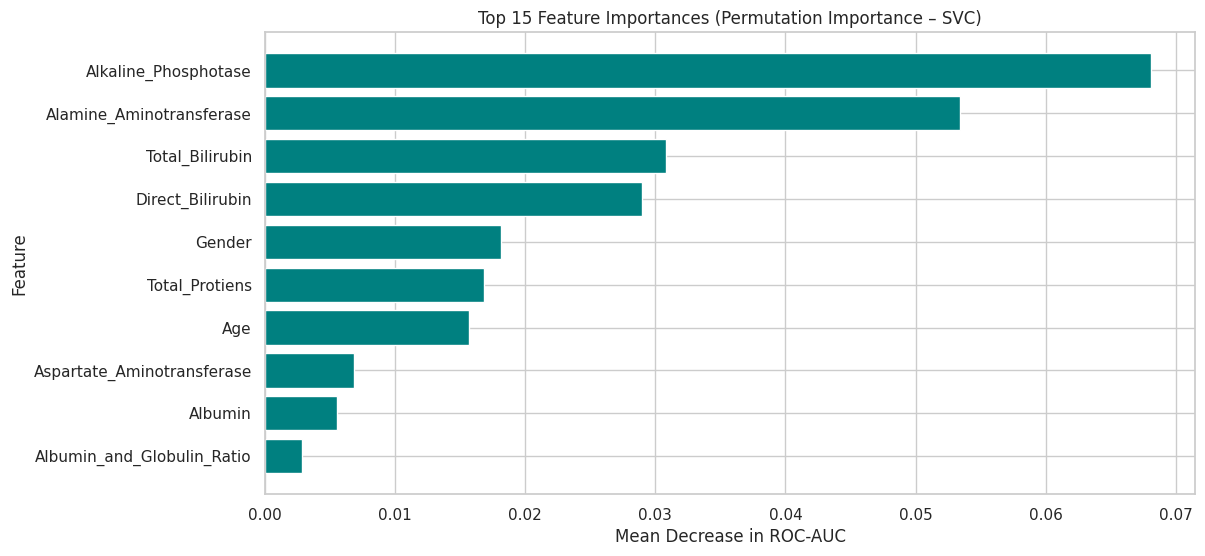

In [365]:
plt.figure(figsize=(12, 6))
plt.barh(
    feature_importance_df["Feature"].head(15),
    feature_importance_df["Importance"].head(15),
    color="teal"
)
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Permutation Importance – SVC)")
plt.xlabel("Mean Decrease in ROC-AUC")
plt.ylabel("Feature")
plt.show()


# **FEATURE IMPORTANCE & MODEL INTERPRETATION**

The feature importance analysis highlights that **biochemical liver function markers** are the most influential predictors of liver disease. Features such as **Total Bilirubin, Direct Bilirubin, Alkaline Phosphatase, ALT, and AST** show the highest importance, reflecting their direct role in assessing liver injury and bile metabolism.

Protein-related markers including **Albumin, Total Proteins, and Albumin–Globulin Ratio** also contribute meaningfully, particularly in identifying chronic liver dysfunction. Demographic features such as **Age and Gender** play a secondary role, acting as risk modifiers rather than direct indicators of liver damage.

Overall, the importance ranking aligns well with **clinical hepatology knowledge**, confirming that the model captures medically meaningful liver disease patterns rather than spurious correlations.

# Why Did the SVC Model Perform Best?

The **Support Vector Classifier (SVC)** achieved the best overall performance for liver disease prediction because of its ability to:

* Model **non-linear relationships** between biochemical markers and disease status using the RBF kernel
* Effectively handle **overlapping class boundaries**, which are common in medical datasets
* Maintain **high recall for liver patients**, minimizing false negatives
* Benefit from **margin maximization**, making it robust to noise and correlated features

Unlike tree-based models that tended to over-predict liver disease, SVC provided a **better balance between sensitivity and specificity**, making it more suitable for real-world clinical screening.


#  **Techniques Used in the Project**

### Data Preprocessing

* Removed duplicate records to reduce bias
* Handled missing values using **median imputation**
* Retained clinically meaningful outliers instead of aggressive removal

### Exploratory Data Analysis (EDA)

* Distribution analysis using histograms and boxplots
* Scatterplots to study enzyme–bilirubin relationships
* Correlation heatmap to identify multicollinearity

### Feature Engineering

* Derived clinically meaningful groupings (e.g., albumin categories)
* Interpreted biochemical interactions rather than arbitrary transformations

### Encoding & Scaling

* Used **ColumnTransformer** for clean preprocessing
* Applied scaling only where required (SVC, Logistic Regression)

### Class Imbalance Handling

* Applied **SMOTE within the pipeline** to avoid data leakage
* Improved detection of minority (non-liver) class

### Machine Learning Models

* Evaluated Logistic Regression, Decision Tree, Random Forest, XGBoost, and SVC
* Used **pipelines** for reproducibility and robustness

### Model Evaluation

* Metrics: **Recall, F1-score, ROC-AUC, confusion matrix**
* Emphasized **false negatives over accuracy**, due to medical risk

### Threshold Optimization

* Used a **custom probability threshold (0.3)** to reduce missed liver cases

### Model Selection

* Selected the final model based on **clinical safety, stability, and interpretability**, not just accuracy


# **Challenges Faced**

### Class Imbalance

The dataset contained more liver patients than non-liver cases, causing early models to over-predict liver disease. This was mitigated using **SMOTE**.

### Overlapping Feature Distributions

Several biochemical markers showed overlapping ranges between liver and non-liver patients, making classification challenging and necessitating non-linear models.

### Outliers in Clinical Measurements

Extreme enzyme and bilirubin values caused instability in some models. Since these represent severe but valid clinical cases, they were retained with careful preprocessing.

### Multicollinearity

Strong correlations were observed between ALT and AST, and between bilirubin measures. While tree models handled this well, it complicated statistical interpretation.

### Balancing Recall vs False Positives

Improving liver recall often increased false positives. A medically informed threshold was required to achieve a safe trade-off.

### Interpretability vs Performance

More complex models offered higher recall but were harder to interpret. SVC provided a reasonable balance between predictive power and explainability.

# Final Conclusion

The **Support Vector Classifier (without hyperparameter tuning)** emerged as the most clinically suitable model for liver disease prediction. It achieved an **accuracy of 77%**, a **liver-patient recall of 94%**, and a strong **F1-score**, ensuring that the majority of liver patients were correctly identified.

Although hyperparameter tuning slightly improved non-liver detection, it increased the number of missed liver cases, making it less suitable from a medical-risk perspective. The chosen model demonstrated robust generalization, stable performance, and strong alignment with clinical priorities.

Overall, this project confirms that **careful preprocessing, imbalance handling, threshold tuning, and medically informed evaluation** are more important than maximizing raw accuracy. The final model provides a **reliable and practical solution for early liver disease screening and decision support**.